##Introduction:
 In this exercise, you're not on the field kicking the ball, but rather analyzing the game's statistics to uncover hidden insights. Your mission is to estimate the proportion of goals scored by a team in a series of matches using Bayesian inference. Imagine you're a football analyst trying to understand how effective a team is at scoring goals. To do this, you'll use a unique approach—analyzing a sequence of matches and recording whether the team scores a goal or not.

##Objective:
Your goal is to develop a Bayesian updating function to estimate the proportion of goals scored by a football team based on the sequence of matches played. Additionally, you'll create a visualization to track how the Bayesian model refines its estimate as more matches are analyzed.



##Step 1: Initial Belief (5 points)
Begin by setting up your initial belief about the proportion of goals scored by the team. Think of this as your starting assumption before any matches are analyzed. We'll represent this belief as a uniform distribution ranging from 0 to 1.

In [71]:
# Step 1: Initialize the prior belief

import numpy as np

# Create an array of 1000 evenly spaced values between 0 and 1

goal_proportions = np.linspace(0, 1, 1000)

# Prior belief: Initially, all proportions are equally likely

prior_belief = np.ones_like(goal_proportions)
prior_belief = prior_belief/1000

##Step 2: Likelihood Function (5 points)
Define a function to calculate the likelihood of observing a particular outcome (goal or no goal) given a certain proportion of goals scored by the team. This function will help update your beliefs based on new match data.

In [72]:
# Step 2: Create the likelihood function

def Likelihood(goal_proportion, outcome):
    
    '''    
    :param goal_proportion: float 
    :param outcome: 0-no goal, 1-yes goal
    :return likelihood
    '''
    
    if outcome == 0:
        likelihood = 1-goal_proportion
    else:
        likelihood = goal_proportion
        
    return likelihood


##Step 3: Bayesian Update(10 points)
Create a function called bayesian_update to perform the Bayesian update. This function will update your prior beliefs using the likelihood of the observed outcomes and normalize the resulting distribution.

In [73]:
# Step 3: Create the bayesian_update function

def Bayesian_update(prior_belief, goal_proportions, outcome):
    
    '''
    :param prior_belief: array
    :param goal_proportions: array of probabilities
    :param outcome: 0-no goal, 1-yes goal
    :return: new_belief
    '''
    new_belief = prior_belief
    
    for i in range(len(goal_proportions)):
        
        P_proportion = prior_belief[i]
        likelihood = Likelihood(goal_proportions[i], outcome)
        new_belief[i] = P_proportion * likelihood
    
    new_belief /= np.sum(new_belief)
    return new_belief

##Step 4: Analyze Match Data (10 points)
Analyze a series of football matches to gather data. Assume a known true proportion of goals scored by the team (let's say 0.6) and generate 10 match outcomes.

In [74]:
# Step 4: Analyze football matches

true_goal_proportion = 0.6
match_num = 10

match_outcomes = np.random.binomial(1, true_goal_proportion, match_num)

print("Match Outcomes:", match_outcomes)


Match Outcomes: [1 1 1 1 0 0 1 1 1 0]


##Step 5: Update and Visualize (15 points)
Iteratively update your prior belief using the Bayesian update function after each match. Then, visualize how the Bayesian model refines its estimate as more match data is collected.

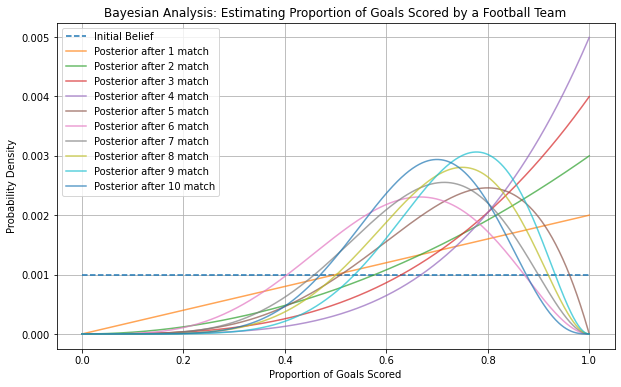

In [75]:
# Step 5: Update prior belief iteratively and store posterior distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(goal_proportions, prior_belief, label='Initial Belief', linestyle='--')


posteriors = []

for i in range(1, len(match_outcomes) + 1):
    prior_belief = Bayesian_update(prior_belief, goal_proportions, match_outcomes[i-1])
    l = []
    for j in prior_belief:
        l.append(j)
    posteriors.append(l)

# Next Step: Visualize the analysis

for i, posterior in enumerate(posteriors):
    plt.plot(goal_proportions, posterior, label=f'Posterior after {i+1} match', alpha=0.7)

plt.xlabel('Proportion of Goals Scored')
plt.ylabel('Probability Density')
plt.title('Bayesian Analysis: Estimating Proportion of Goals Scored by a Football Team')
plt.legend()
plt.grid(True)
plt.show()
